In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 

import sys
sys.path.append(f'/home/beans/bespoke')
from constants import *

import matplotlib.pyplot as plt
from viz_utils import draw_wps
from blender_dataloader import *
from constants import *
from imports import *
from train_utils import get_torque

/home/beans/miniconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:689: FutureWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn(
/home/beans/miniconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:965: FutureWarning: This class has been deprecated. Please use ImageCompression
  warnings.warn(


In [2]:
get_obs_per_sec()

199.02151

In [3]:
paths = glob.glob(f"{BLENDER_MEMBANK_ROOT}/**/obs_per_sec.npy", recursive=True)
obs_per_sec = np.array([np.load(p)[0] for p in paths])
obs_per_sec

array([14.057306 , 15.887219 , 20.327412 , 13.2667465, 20.352282 ,
       13.175943 , 17.185162 , 14.80649  , 16.244644 , 20.144531 ,
       20.065866 , 15.230763 ], dtype=float32)

In [4]:
#set_should_stop(True)

In [5]:
dataloader = BlenderDataloader("trn", 6)

In [6]:
dataloader.get_obs_per_second()

202.14848

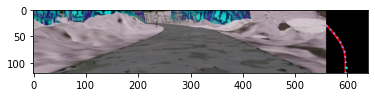

In [7]:
ix = 4
plt.imshow(dataloader.img_chunk[ix][0])

(array([ 69.,  72., 129., 121.,  40., 124.,  66., 173., 216., 382.]),
 array([27.086784, 32.321728, 37.556667, 42.79161 , 48.02655 , 53.261494,
        58.496437, 63.731377, 68.96632 , 74.20126 , 79.4362  ],
       dtype=float32),
 <BarContainer object of 10 artists>)

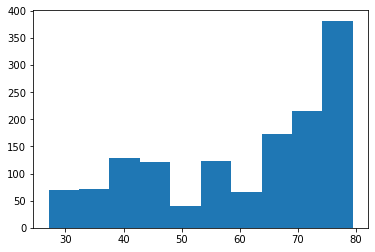

In [8]:
plt.hist(dataloader.aux_chunk[:,:,2].flatten())

(array([  8.,   7.,   8.,  44., 307., 663., 172.,  79.,  61.,  43.]),
 array([-0.3635332 , -0.2977674 , -0.23200163, -0.16623583, -0.10047005,
        -0.03470427,  0.03106152,  0.09682731,  0.1625931 ,  0.22835888,
         0.29412466], dtype=float32),
 <BarContainer object of 10 artists>)

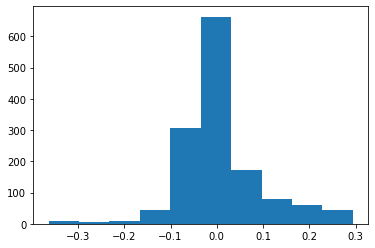

In [9]:
plt.hist(dataloader.targets_chunk[:,:,14].flatten())

In [10]:
%%time
batch, is_first_in_seq = dataloader.get_batch()

(img, 
                                    aux, 
                                    wp_angles,
                                     wp_headings,
                                     wp_curvatures,
                                     to_pred_mask,
                                    current_tire_angles_rad, # Extras
                                    current_speeds_mps, 
                                    pitch, 
                                    yaw) = batch

is_first_in_seq

CPU times: user 981 µs, sys: 348 µs, total: 1.33 ms
Wall time: 1.32 ms


True

In [11]:
wp_angles.shape, wp_headings.shape, wp_curvatures.shape

(torch.Size([6, 9, 30]), torch.Size([6, 9, 30]), torch.Size([6, 9, 30]))

(array([ 65.,  96.,  33.,  29., 244., 354., 725.,  42.,  11.,  21.]),
 array([-9.76  , -8.164 , -6.57  , -4.973 , -3.379 , -1.785 , -0.1907,
         1.404 ,  2.998 ,  4.594 ,  6.188 ], dtype=float16),
 <BarContainer object of 10 artists>)

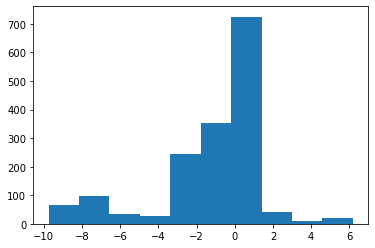

In [12]:
plt.hist((wp_angles*to_pred_mask).flatten().detach().cpu().numpy())

(array([ 36.,  52.,  81.,  49., 122., 431., 669., 118.,  27.,  35.]),
 array([-10.766 ,  -9.07  ,  -7.38  ,  -5.688 ,  -3.992 ,  -2.299 ,
         -0.6055,   1.088 ,   2.781 ,   4.477 ,   6.168 ], dtype=float16),
 <BarContainer object of 10 artists>)

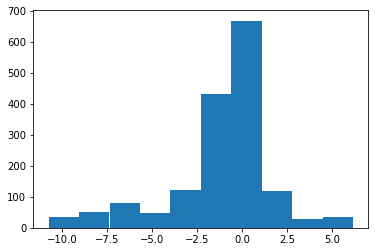

In [13]:
plt.hist((wp_headings*to_pred_mask).flatten().detach().cpu().numpy())

(array([ 11.,  15.,  16.,  36., 198., 512., 636.,  48.,  59.,  89.]),
 array([-2.623 , -2.213 , -1.805 , -1.395 , -0.9854, -0.576 , -0.1667,
         0.2426,  0.652 ,  1.062 ,  1.471 ], dtype=float16),
 <BarContainer object of 10 artists>)

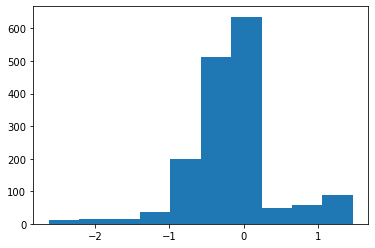

In [14]:
plt.hist((wp_curvatures*to_pred_mask).flatten().detach().cpu().numpy())

In [15]:
to_pred_mask.sum() / to_pred_mask.numel()

tensor(0.8809, device='cuda:0', dtype=torch.float16)

(array([9., 1., 8., 6., 3., 0., 5., 8., 5., 9.]),
 array([-12240.88   , -10645.392  ,  -9049.903  ,  -7454.4146 ,
         -5858.9263 ,  -4263.438  ,  -2667.9495 ,  -1072.461  ,
           523.02734,   2118.5156 ,   3714.0042 ], dtype=float32),
 <BarContainer object of 10 artists>)

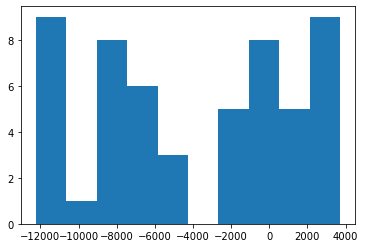

In [16]:
t = get_torque(wp_angles, aux)
plt.hist(t.cpu().numpy().flatten())

In [17]:
abs(t).max()

tensor(12240.8799, device='cuda:0')

(array([10., 19., 12.,  1.,  1.,  2.,  1.,  1.,  0.,  1.]),
 array([   2.3530273,  102.832375 ,  203.31172  ,  303.79108  ,
         404.27042  ,  504.74976  ,  605.2291   ,  705.70844  ,
         806.1878   ,  906.6671   , 1007.1465   ], dtype=float32),
 <BarContainer object of 10 artists>)

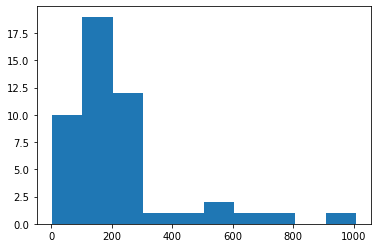

In [18]:
td = abs(t[:,1:,:] - t[:,:-1,:])
plt.hist(td.cpu().numpy().flatten())

In [19]:
abs(td).max()

tensor(1007.1465, device='cuda:0')

In [8]:
import subprocess

In [9]:
# Load up membank from ssd to shm
subprocess.run("cp -R /media/beans/beans_data/blender_membank /dev/shm/blender_membank", shell=True)

CompletedProcess(args='cp -R /media/beans/beans_data/blender_membank /dev/shm/blender_membank', returncode=0)

In [ ]:
# save membank to ssd
subprocess.run("cp -R /dev/shm/blender_membank /media/beans/beans_data/blender_membank", shell=True)